## The mathematical building blocks of neural networks

### A first look at a neural network

In [38]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
train_images.shape

(60000, 28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

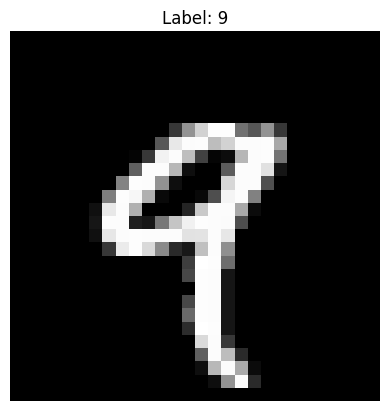

In [40]:
import matplotlib.pyplot as plt

plt.imshow(train_images[4], cmap='gray')
plt.title(f"Label: {train_labels[4]}")
plt.axis('off')


In [41]:
import numpy as np

# Show full NumPy arrays in the output (no truncation)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# Print the 28x28 numeric array for the example image (not flattened)
print(train_images[4])
print("shape:", train_images[4].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

In [42]:
len(train_labels)

60000

In [43]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [44]:
test_images.shape

(10000, 28, 28)

In [45]:
test_labels[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ]
)

In [47]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [48]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [49]:
import numpy as np
# Show full NumPy arrays in the output (no truncation)
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
# Print the flattened 784-length vector for the example image
print(train_images[4])
# If you prefer a 28x28 numeric grid, uncomment the next line:
# print(train_images[4].reshape(28, 28))


[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.       

In [50]:
test_images[4].shape

(784,)

In [51]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9247 - loss: 0.2656
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9697 - loss: 0.1064
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9798 - loss: 0.0697
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0490
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9895 - loss: 0.0366


In [ ]:
test_digits = test_images[0:10]

In [53]:
predictions = model.predict(test_digits)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [54]:
predictions[0]

array([9.1070639e-08, 2.0458588e-08, 1.0383122e-05, 1.3979903e-04, 1.2944007e-09, 1.1008746e-06, 4.7764490e-11, 9.9984115e-01, 6.7496416e-07, 6.8805580e-06], dtype=float32)

In [55]:
predictions[0].argmax()

np.int64(7)

In [56]:
predictions[0][7]

np.float32(0.99984115)

In [57]:
test_labels[0]

np.uint8(7)

In [58]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9800 - loss: 0.0638
test_acc: 0.9800000190734863


### Summary of results and explanation

- **Training run (5 epochs):** final training accuracy ≈ **98.92%** (training loss decreased across epochs).
- **Test evaluation:** test accuracy ≈ **97.94%** (reported by `model.evaluate`).

**Error-rate comparison (why the book says “almost double the error rate”)**

- Training error = 1 − training_accuracy = 1 − 0.9892 ≈ **1.08%**
- Test error = 1 − test_accuracy = 1 − 0.9794 ≈ **2.06%**
- Relative ratio: test_error / train_error ≈ 2.06% / 1.08% ≈ **1.9** → nearly **2×**.

So the book compares **error rates** (not accuracies) and finds the test error is almost double the training error. The absolute gap is small (~1 percentage point), but relative to the tiny training error it is large, hence the phrasing.

### What this means (overfitting)

- **Overfitting**: the model performs noticeably better on its training data than on unseen data (test set).
- Here: the model fits the training data very well (very low training error) but performs slightly worse on new data — a classic sign of some overfitting.
- Magnitude nuance: the absolute difference is small, but relative difference is meaningful because training error is already tiny.

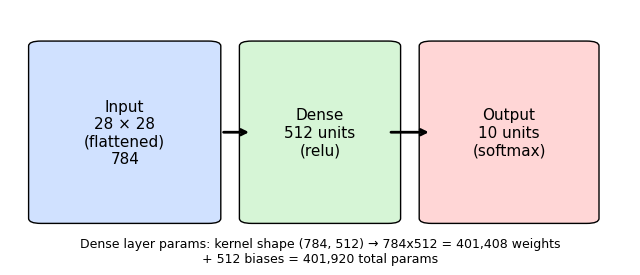

In [59]:
# Visualize the simple MLP architecture: input (28x28 -> 784) -> Dense(512) -> Dense(10)
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

fig, ax = plt.subplots(figsize=(8,3.2))
ax.add_patch(FancyBboxPatch((0.05,0.15),0.27,0.7, boxstyle="round,pad=0.02", fc="#d0e1ff", ec="k"))
ax.text(0.05+0.27/2, 0.5, "Input\n28 × 28\n(flattened)\n784", ha='center', va='center', fontsize=11)

ax.add_patch(FancyBboxPatch((0.39,0.15),0.22,0.7, boxstyle="round,pad=0.02", fc="#d6f5d6", ec="k"))
ax.text(0.39+0.22/2, 0.5, "Dense\n512 units\n(relu)", ha='center', va='center', fontsize=11)

ax.add_patch(FancyBboxPatch((0.68,0.15),0.25,0.7, boxstyle="round,pad=0.02", fc="#ffd6d6", ec="k"))
ax.text(0.68+0.25/2, 0.5, "Output\n10 units\n(softmax)", ha='center', va='center', fontsize=11)

# arrows (reversed to point left -> right)
ax.annotate("", xy=(0.39,0.5), xytext=(0.34,0.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.68,0.5), xytext=(0.61,0.5), arrowprops=dict(arrowstyle="->", lw=2))

# parameter note
params_text = "Dense layer params: kernel shape (784, 512) → 784x512 = 401,408 weights\n+ 512 biases = 401,920 total params"
ax.text(0.5, 0.018, params_text, ha='center', va='center', fontsize=9)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.axis('off')
plt.show()